Epoch 1/5
1500/1500 [==============================] - 11s 7ms/step - loss: 0.2859 - accuracy: 0.9190 - val_loss: 0.1547 - val_accuracy: 0.9539
Epoch 2/5
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1228 - accuracy: 0.9644 - val_loss: 0.1142 - val_accuracy: 0.9653
Epoch 3/5
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0835 - accuracy: 0.9752 - val_loss: 0.0959 - val_accuracy: 0.9718
Epoch 4/5
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0634 - accuracy: 0.9811 - val_loss: 0.0943 - val_accuracy: 0.9728
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0898 - accuracy: 0.9722
Test accuracy: 0.9721999764442444


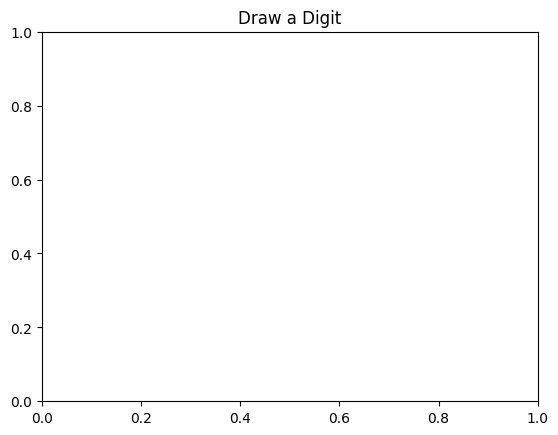

In [ ]:

import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image, ImageDraw

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('mnist_model.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Function to draw and recognize digits
class DrawingApp:
    def __init__(self):
        self.fig, self.ax = plt.subplots()
        self.ax.set_title('Draw a Digit')
        self.image = Image.new('L', (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.last_x, self.last_y = None, None

        self.canvas = self.fig.canvas
        self.canvas.mpl_connect('button_press_event', self.on_mouse_down)
        self.canvas.mpl_connect('button_release_event', self.on_mouse_up)
        self.canvas.mpl_connect('motion_notify_event', self.on_mouse_move)

        self.recognize_button = widgets.Button(description='Recognize')
        self.recognize_button.on_click(self.recognize_digit)

        self.clear_button = widgets.Button(description='Clear')
        self.clear_button.on_click(self.clear_canvas)

        self.output = widgets.Output()
        display(widgets.VBox([self.recognize_button, self.clear_button, self.output]))
        display(self.canvas)

    def on_mouse_down(self, event):
        self.last_x, self.last_y = event.xdata, event.ydata

    def on_mouse_up(self, event):
        self.last_x, self.last_y = None, None

    def on_mouse_move(self, event):
        if self.last_x is not None and event.xdata is not None and event.ydata is not None:
            x1, y1 = self.last_x, self.last_y
            x2, y2 = event.xdata, event.ydata
            self.draw.line([x1, y1, x2, y2], fill='black', width=5)
            self.last_x, self.last_y = x2, y2
            self.update_canvas()

    def update_canvas(self):
        self.ax.clear()
        self.ax.imshow(self.image, cmap='gray')
        self.ax.set_title('Draw a Digit')
        self.canvas.draw()

    def clear_canvas(self, event):
        self.image = Image.new('L', (200, 200), 255)
        self.draw = ImageDraw.Draw(self.image)
        self.update_canvas()

    def recognize_digit(self, event):
        resized_image = self.image.resize((28, 28))
        image_array = np.array(resized_image)
        image_array = 255 - image_array
        image_array = image_array / 255.0
        image_array = image_array.reshape(1, 28, 28)

        model = tf.keras.models.load_model('mnist_model.h5')
        prediction = model.predict(image_array)
        predicted_digit = np.argmax(prediction)

        with self.output:
            clear_output()
            print(f"Predicted Digit: {predicted_digit}")

if __name__ == "__main__":
    app = DrawingApp()


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output
from PIL import Image

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_split=0.2)

# Save the trained model
model.save('mnist_model.h5')

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Function to upload and recognize digits
class UploadApp:
    def __init__(self):
        self.upload_button = widgets.FileUpload(accept='.png, .jpg, .jpeg', multiple=False)
        self.upload_button.observe(self.on_upload, names='value')

        self.recognize_button = widgets.Button(description='Recognize')
        self.recognize_button.on_click(self.recognize_digit)

        self.clear_button = widgets.Button(description='Clear')
        self.clear_button.on_click(self.clear_output)

        self.output = widgets.Output()

        display(widgets.VBox([self.upload_button, self.recognize_button, self.clear_button, self.output]))

    def on_upload(self, change):
        self.image_file = self.upload_button.value
        for name, file_info in self.image_file.items():
            self.image = Image.open(file_info['metadata']['name']).convert('L')
            with self.output:
                clear_output()
                display(self.image)

    def recognize_digit(self, event):
        if self.image:
            resized_image = self.image.resize((28, 28))
            image_array = np.array(resized_image)
            image_array = 255 - image_array
            image_array = image_array / 255.0
            image_array = image_array.reshape(1, 28, 28)

            model = tf.keras.models.load_model('mnist_model.h5')
            prediction = model.predict(image_array)
            predicted_digit = np.argmax(prediction)

            with self.output:
                print(f"Predicted Digit: {predicted_digit}")

    def clear_output(self, event):
        with self.output:
            clear_output()
        self.upload_button.value.clear()
        self.image = None

if __name__ == "__main__":
    app = UploadApp()


Epoch 1/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2848 - accuracy: 0.9196 - val_loss: 0.1520 - val_accuracy: 0.9567
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1228 - accuracy: 0.9636 - val_loss: 0.1213 - val_accuracy: 0.9641
Epoch 3/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0837 - accuracy: 0.9754 - val_loss: 0.1010 - val_accuracy: 0.9701
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0615 - accuracy: 0.9815 - val_loss: 0.0926 - val_accuracy: 0.9713
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0854 - accuracy: 0.9745
Test accuracy: 0.9745000004768372


1/1 [==============================] - 0s 53ms/step


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)



import os
for dirname, _, filenames in os.walk('Water Bodies Dataset'):
    for filename in filenames:
        pass
        #print(os.path.join(dirname, filename))
import tensorflow as tf
import cv2
import os
import sys
import random
import numpy as np
import glob

from tqdm import tqdm
import tifffile as tif
from PIL import Image
from skimage.io import imread,imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda
from keras.models import Model
import warnings
warnings.filterwarnings("ignore")
def prep_image(image, crop_size, size_y, size_x):
    # Resize the image
    prepd_image = cv2.resize(image,(size_y, size_x))
    # Crop the image to remove the border black pixels
    prepd_image = prepd_image[crop_size:-crop_size, crop_size:-crop_size]
    return prepd_image
size_x=148
size_y=148
crop_size=10
################# Storing Train Images into an array #############
train_images=[]

for directory_path in glob.glob("Water Bodies Dataset/Images"):
    for img_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        #print(img_path)
        img=cv2.imread(img_path,cv2.IMREAD_COLOR)
        image=cv2.imread(img_path,cv2.IMREAD_COLOR)
        img=prep_image(img,crop_size,size_y,size_x)
        train_images.append(img)

train_images = np.array(train_images) #converting list to array
################# Storing Train Masks into an array #############
train_masks = []

for directory_path in glob.glob("Water Bodies Dataset/Masks"):
    for mask_path in glob.glob(os.path.join(directory_path,"*.jpg")):
        mask=cv2.imread(mask_path,0)
        mask=prep_image(mask,crop_size,size_y,size_x)
        train_masks.append(mask)

train_masks = np.array(train_masks) #converting list to array
len(train_images), len(train_masks)
train_images[0].shape, train_masks[0].shape
np.min(train_images[0]), np.max(train_images[0]), np.min(train_masks[0]), np.max(train_masks[0])
#normalizing
x = train_images/255
y = train_masks/255
np.min(x[0]), np.max(x[0]), np.min(y[0]), np.max(y[0])
########## Displaying random image from X_train and Y_train #########
random_num = random.randint(0,516)
imshow(x[random_num])
plt.show()
imshow(y[random_num])
plt.show()

test_img = x[random_num]
test_img2 = y[random_num]
print(test_img.min(), test_img.max())
print(test_img.shape)

print(test_img2.min(), test_img2.max())
print(test_img2.shape)
#splitting
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2, random_state=42)
#UNet model building
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

def simple_unet_model(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS):
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    #s = Lambda(lambda x: x / 255)(inputs)   #No need for this if we normalize our inputs beforehand
    s = inputs

    #Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)

    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)

    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)

    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)

    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

    #Expansive path
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

    outputs = Conv2D(1, (1, 1), activation='sigmoid')(c9)

    model = Model(inputs=[inputs], outputs=[outputs])
    # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    # model.summary()

    return model
def get_model():
    return simple_unet_model(IMG_HEIGHT,IMG_WIDTH,IMG_CHANNELS)
model = get_model()
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history=model.fit(x_train,
          y_train,
          batch_size=25,
          epochs=60,
          verbose=1,
          validation_data=(x_val, y_val))
#plot the training and validation loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
#plot the training and validation accuracy at each epoch
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, 'y', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
########## Predicting random images from x_val #########
for i in range(0,7):
    random_num = random.randint(0,500)
    original_image = x_val[random_num]
    imshow(original_image)
    print("Original Image: ")
    plt.show()

    original_image=np.expand_dims(original_image,axis=0)
    predicted_mask = model.predict(original_image)
    predicted_mask = predicted_mask.reshape(mask.shape)
    print("Predicted Mask: ")
    imshow(predicted_mask,cmap='gray')
    plt.show()
    image_mean= predicted_mask.mean()
    fraction =  image_mean
    percentage = fraction * 100
    formatted_percentage = '{:.2f}%'.format(round(percentage, 2))

    print("mean:",formatted_percentage)
    i+=1
    sq = 21086.64
# 14 pixels * 10 meters/pixel * 14 pixels * 10 meters/pixel = 1,960 square meters
# 1,960 square meters * 10.764 square feet/square meter = 21,086.64 square feet
    waterbodies = float(image_mean) * sq
    print("water body:",waterbodies , 'square feet')
model.save("water_bodies_segmentation_76.h5")

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
!sudo apt-get install tesseract-ocr
!pip install pytesseract
!pip install opencv-python

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,822 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [ ]:
import pytesseract
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
from google.colab import files
uploaded=files.upload()
for fn in uploaded.keys():
  img_path=fn

Saving textimage2 to textimage2 (3)


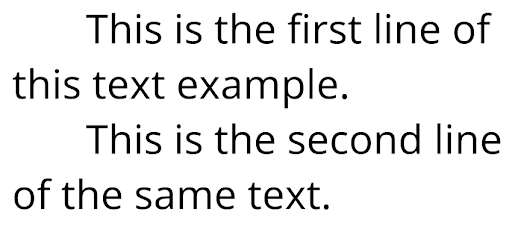

In [ ]:
img=cv2.imread("/content/textimage2")
cv2_imshow(img)

In [ ]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
text=pytesseract.image_to_string(gray)
print("Extracted Text:")
print(text)

Extracted Text:
This is the first line of
this text example.

This is the second line
of the same text.

